In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cymr import network

## Primacy

In [2]:
L = 1
P1 = np.array([0, 1, 2, 4, 8])
P2 = np.array([.1, .5, 1, 2.5, 5])
n_item = 24
items = np.arange(24)

s_list = []
for i in P1:
    for j in P2:
        prim = network.primacy(n_item, L, i, j)
        s = pd.DataFrame({'position': items, 'learning': prim, 'L': L, 'P1': i, 'P2': j})
        s_list.append(s)
df = pd.concat(s_list, axis=0, ignore_index=True)

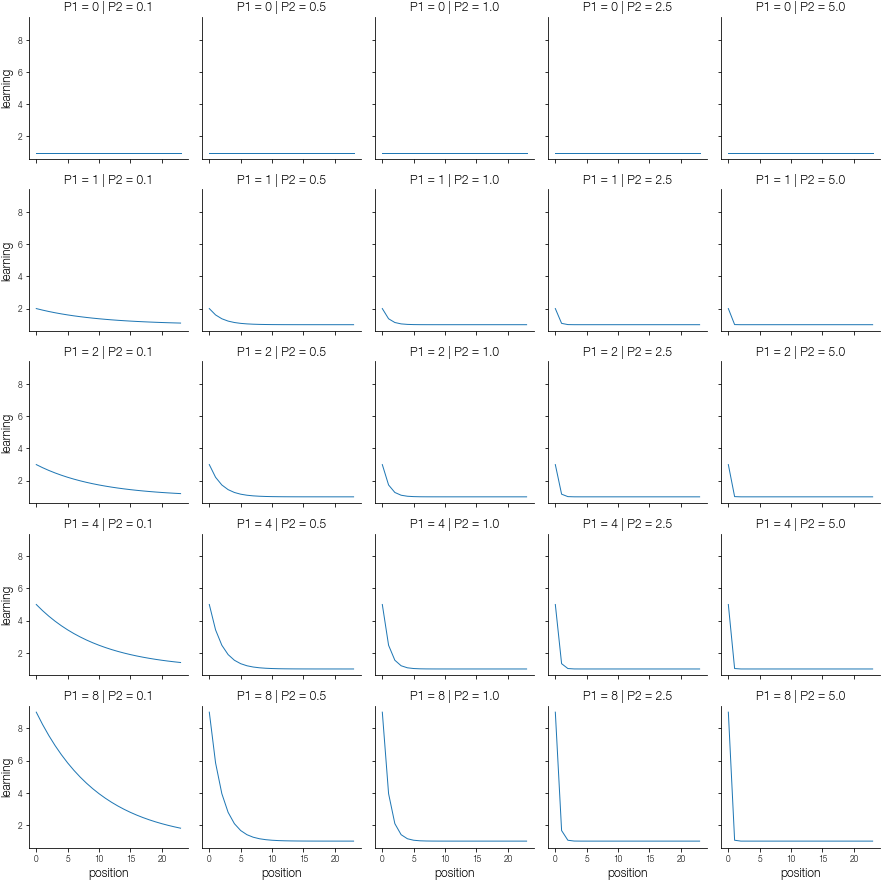

In [3]:
sns.relplot(kind='line', x='position', y='learning', row='P1', col='P2', 
            data=df, height=2.5);

## Decision probability

In [4]:
T = np.array([.1, .5, 1, 2, 10])
P1 = np.array([0, 1, 2, 4, 8])

df_list = []
for i in T:
    for j in P1:
        support = network.primacy(n_item, 1, j, 1)
        strength = np.exp((2 * support) / i)
        p = strength / np.sum(strength)
        d = pd.DataFrame({'position': items, 'p': p, 'P1': j, 'T': i})
        df_list.append(d)
df = pd.concat(df_list, ignore_index=True)

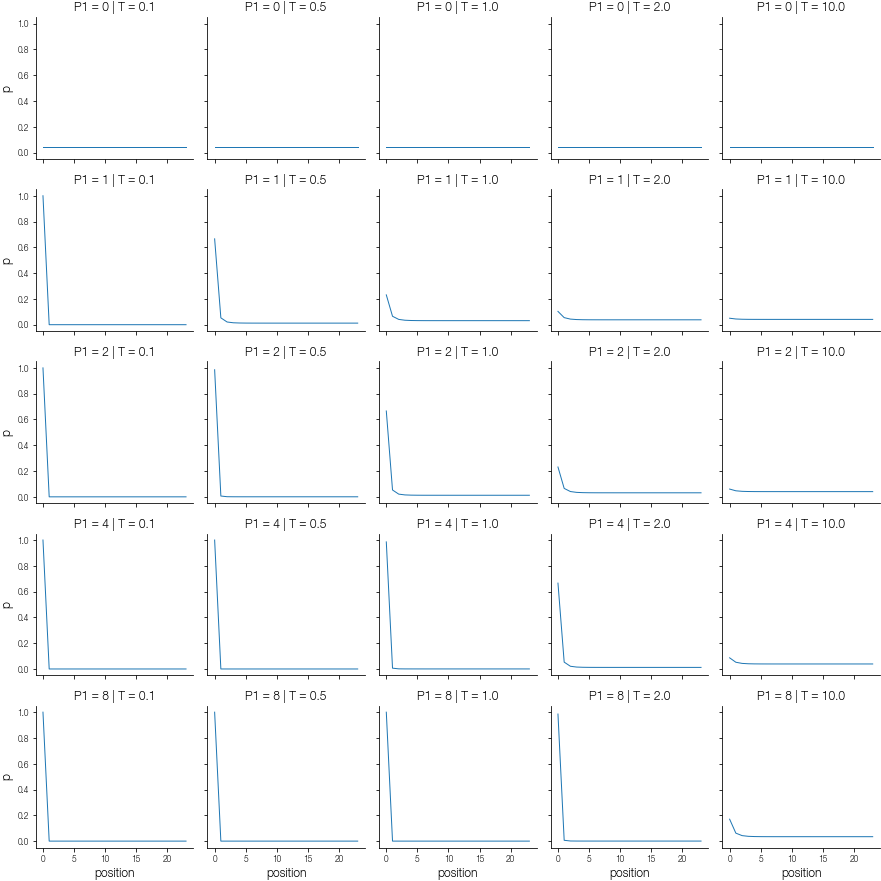

In [5]:
sns.relplot(kind='line', x='position', y='p', row='P1', col='T', 
            data=df, height=2.5);

## Probability of stopping

In [6]:
X1 = np.array([0, .04, .08, .16, .32])
X2 = np.array([0, .1, .5, 1, 5])

position = np.arange(25)
df_list = []
for i in X1:
    for j in X2:
        p = network.p_stop_op(n_item, i, j)
        d = pd.DataFrame({'position': position, 'p': p, 'X1': i, 'X2': j})
        df_list.append(d)
df = pd.concat(df_list, ignore_index=True)

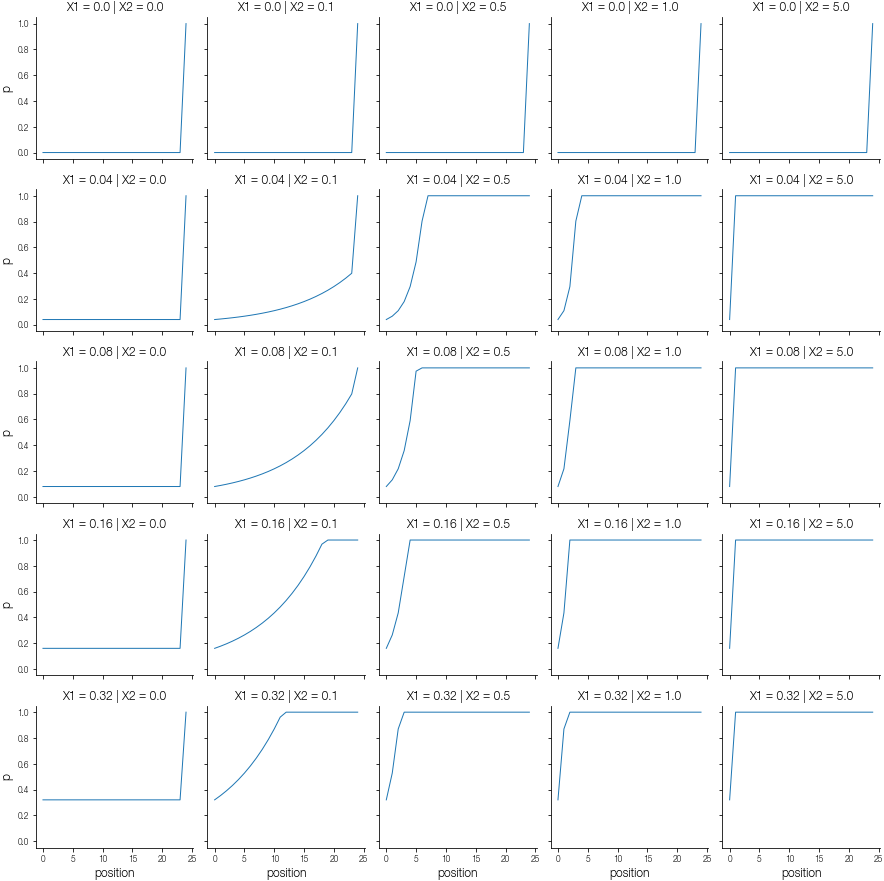

In [7]:
sns.relplot(kind='line', x='position', y='p', row='X1', col='X2', 
            data=df, height=2.5);